# Dataset 2: City of Pittsburgh Trees
## Introduction
One of the most important things to consider when running from the cops is where to hide, and whether or not you will have any cover. That's why I decided to look at the quantity and quality of trees in each Pittsburgh neighborhood, as trees provide lots of cover and can be useful when looking for a hiding spot.

I also considered looking at vacant residences in Pittsburgh, but I eventually decided on this dataset instead because it was more complete and easier to work with. Plus, I like nature.

In [1]:
#import pandas and stuff
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
#import the dataset
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
trees.head(10)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
9,1484901843,1456,WOODBINE ST,Maple: Norway,Acer platanoides,NaN,NaN,NaN,NaN,Open or Unrestricted,...,Stanton Heights,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.485240,-79.936390


## The Metrics
As you can tell, this dataset includes a lot of information on each of the trees in the City of Pittsburgh. The main things I wanted to focus on, however, is the neighborhoods of the trees (and how many trees there are in each), and the widths of the trees, as the wider the tree is the easier it is to hide behind.

Looking at the table above, you can see that some of the data includes stumps, and some of the widths and heights are either 0 or not included in the data. You can't hide from the police behind a stump, nor can you hide behind a tree that's 0 or NaN units wide, so I needed to use a query mask to filter out those faux trees:

In [73]:
stump_mask = trees["common_name"] != "Stump"
width_mask = trees["width"] > 0
height_mask = trees["height"] > 0
real_trees = trees[stump_mask & width_mask & height_mask]
real_trees.head(10)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
10,998993932,3233,THAYER ST,Honeylocust: Thornless,Gleditsia triacanthos inermis,48.0,20.0,99.0,99.0,Open or Restricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453213,-80.067245
11,1870646392,1427,ISOLINE ST,Oak: Northern Red,Quercus rubra,65.0,20.0,99.0,99.0,Open or Unrestricted,...,Chartiers City,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.455997,-80.070408
12,829500067,1400,EVANSTON ST,Maple: Norway,Acer platanoides,22.0,12.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453446,-80.070094


I also wanted to trim the data down to just the metrics I'm using in my analysis, so I created a new DataFrame from the one above that includes just the number of trees in each neighborhood, and the average width of those trees:

In [75]:
num_trees = pd.DataFrame(real_trees.groupby("neighborhood").id.count()).rename(columns = {"id":"num"})
tree_widths = pd.DataFrame(real_trees.groupby("neighborhood").width.mean())
tree_data = num_trees.merge(tree_widths, left_on = "neighborhood", right_on = "neighborhood")
tree_data.head(10)

,num,width
neighborhood,,
Allegheny Center,19,13.368421
Allegheny West,228,8.750000
Allentown,56,9.375000
Arlington,78,6.794872
Arlington Heights,3,19.000000
Banksville,412,8.992718
Bedford Dwellings,167,7.005988
Beechview,518,8.281853
Beltzhoover,101,8.871287


Now that we have an actual, useful dataset, we can start to analyze the data.
## The Best Neighborhood
First, let's look at the neighborhoods with the most trees in them. Here's a list of the top 10:

In [76]:
num_sorted = tree_data.sort_values(by = "num", ascending = False)
num_sorted.head(10)

,num,width
neighborhood,,
Squirrel Hill South,2354,9.657179
Squirrel Hill North,1571,12.919796
South Side Flats,1418,6.872355
Shadyside,1272,9.110063
East Liberty,1184,7.297297
Bloomfield,1116,8.310932
Highland Park,1067,9.686036
Point Breeze,946,10.375264
Central Business District,872,10.944954


And here's the top 25 in bar graph form:

Text(0, 0.5, 'Number of Trees')

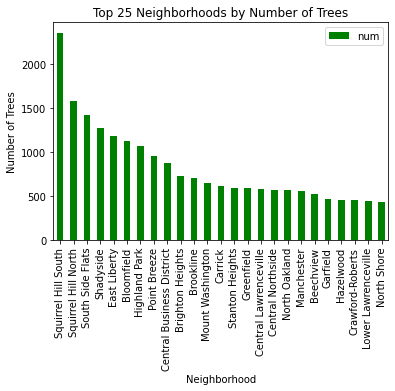

In [58]:
num_plot = num_sorted.head(25).plot(kind = "bar", y = "num", title = "Top 25 Neighborhoods by Number of Trees", color = "green")
num_plot.set_xlabel("Neighborhood")
num_plot.set_ylabel("Number of Trees")

This is nice, but this is only 25 neighborhoods. In order to view all of the neighborhoods, I decided to utilize geopandas and make a map of the number of trees in each neighborhood:

In [77]:
#import map data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
tree_map = neighborhoods.merge(tree_data, how = "left", left_on = "hood", right_on = "neighborhood")

Text(0.5, 1.0, 'Number of Trees')

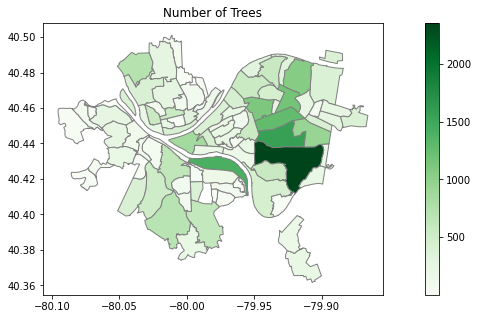

In [61]:
tree_map.plot(column='num',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )
plt.title("Number of Trees")

So Squirrel Hill is a clear outlier when it comes to the number of trees in each neighborhood, but what about the width of the trees? Here's a list of the top 10 neighborhoods bby average width of trees:

In [62]:
width_sorted = tree_data.sort_values(by = "width", ascending = False)
width_sorted.head(10)

,num,width
neighborhood,,
East Carnegie,4,20.000000
Arlington Heights,3,19.000000
Fineview,76,14.513158
St. Clair,11,13.727273
Allegheny Center,19,13.368421
Squirrel Hill North,1571,12.919796
Sheraden,259,12.845560
Fairywood,18,12.777778
Perry South,277,11.902527


And another bar graph:

Text(0, 0.5, 'Average Width of Trees')

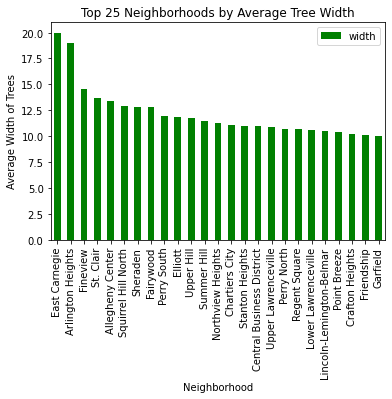

In [65]:
width_plot = width_sorted.head(25).plot(kind = "bar", y = "width", title = "Top 25 Neighborhoods by Average Tree Width", color = "green")
width_plot.set_xlabel("Neighborhood")
width_plot.set_ylabel("Average Width of Trees")

And here's the map:

Text(0.5, 1.0, 'Average Width of Trees')

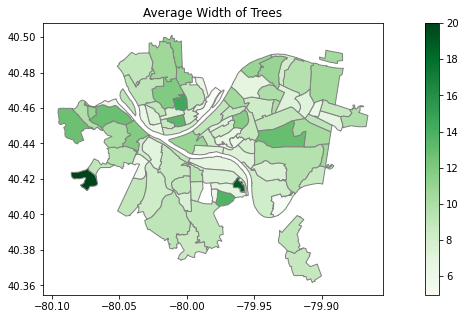

In [80]:
tree_map.plot(column='width',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )
plt.title("Average Width of Trees")

When it comes to the width of trees, the outliers become East Carnegie and Arlington Heights.

I needed a way to combine these two metrics so I could come to a conclusive "best neighborhood to hide behind a tree from the police". But first I made a scatterplot to better visualize it:

Text(0, 0.5, 'Number of Trees')

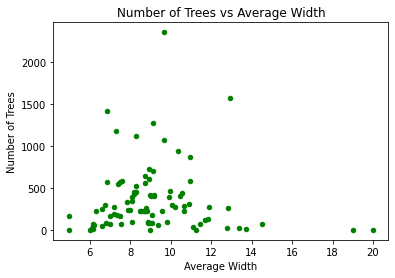

In [28]:
splot = tree_data.plot(kind="scatter", x = "width", y = "num", title = "Number of Trees vs Average Width", color = "green")
splot.set_xlabel("Average Width")
splot.set_ylabel("Number of Trees")

In order to find the conclusive best neighborhood based on this dataset, I multiplied the number of trees by neighborhood with the average width of the trees. This gave me the total amount of tree in each neighborhood, which I mapped here:

Text(0.5, 1.0, 'Total Amount of Tree')

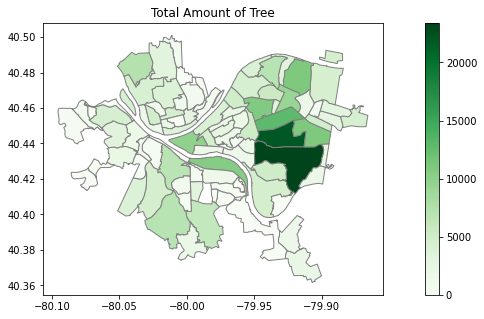

In [75]:
tree_map["total"] = tree_map["num"] * tree_map["width"]
tree_map.plot(column='total',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )
plt.title("Total Amount of Tree")

And here's a bar graph:

Text(0, 0.5, 'Total Amount of Tree')

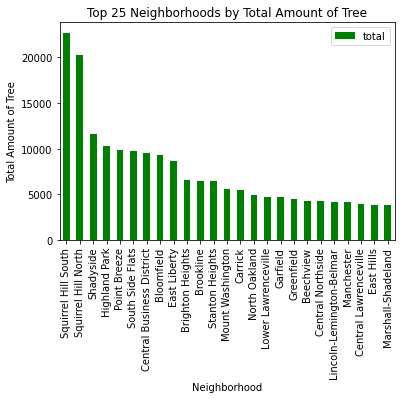

In [85]:
tree_data["total"] = tree_data["num"] * tree_data["width"]
total_sorted = tree_data.sort_values(by = "total", ascending = False)
total_plot = total_sorted.head(25).plot(kind = "bar", y = "total", title = "Top 25 Neighborhoods by Total Amount of Tree", color = "green")
total_plot.set_xlabel("Neighborhood")
total_plot.set_ylabel("Total Amount of Tree")

## Conclusion
To conclude, the best neighborhoods based on the amount of tree are clearly the ones towards eastern Pittsburgh, with Squirrel Hill South and Squirrel Hill North a tier above the rest. 